### part 1: datatime index and resample

In [1]:
import pandas as pd
# to turn Date into Timestamp, you can use parse_dates["Date"] in .read_csv
#df = pd.read_csv('AAPL (1).csv', parse_dates = ["Date"], index_col = "Date")
#df.head()

In [2]:
# change date time index without read_csv arg
#df['Date'] = pd.to_datetime(df['Date'])
#type(df.Date[0])

In [3]:
#df["2017-01"].Close.mean()

In [4]:
#df.index

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/14_ts_datetimeindex/aapl.csv', parse_dates = ["Date"], index_col = "Date")
df

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-06-30,144.45,144.96,143.78,144.02,23024107
...,...,...,...,...,...
2016-07-15,98.92,99.30,98.50,98.78,30136990
2016-07-14,97.39,98.99,97.32,98.79,38918997
2016-07-13,97.41,97.67,96.84,96.87,25892171


In [6]:
df.loc["2017-01"].Close.mean()

119.57000000000001

In [7]:
df.loc["2017-01-03"]

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,115.8,116.33,114.76,116.15,28781865


<AxesSubplot:title={'center':'Mean Monthly Close Price'}, xlabel='Date', ylabel='Close Price'>

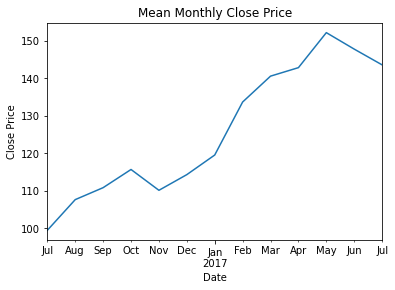

In [8]:
%matplotlib inline
df.Close.resample('M').mean().plot(title="Mean Monthly Close Price", ylabel="Close Price")

### part 2: date_range

In [9]:
df2 = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/pandas/15_ts_date_range/aapl_no_dates.csv")
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-06-30,144.45,144.96,143.78,144.02,23024107


In [10]:
rng = pd.date_range(start="6/1/2017", end="6/30/2017", freq="B")
rng

DatetimeIndex(['2017-06-01', '2017-06-02', '2017-06-05', '2017-06-06',
               '2017-06-07', '2017-06-08', '2017-06-09', '2017-06-12',
               '2017-06-13', '2017-06-14', '2017-06-15', '2017-06-16',
               '2017-06-19', '2017-06-20', '2017-06-21', '2017-06-22',
               '2017-06-23', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', freq='B')

In [11]:
df2.set_index(rng, inplace=True)
df2

,Open,High,Low,Close,Volume
2017-06-01,153.17,153.33,152.22,153.18,16404088
2017-06-02,153.58,155.45,152.89,155.45,27770715
2017-06-05,154.34,154.45,153.46,153.93,25331662
2017-06-06,153.90,155.81,153.78,154.45,26624926
2017-06-07,155.02,155.98,154.48,155.37,21069647
2017-06-08,155.25,155.54,154.40,154.99,21250798
2017-06-09,155.19,155.19,146.02,148.98,64882657
2017-06-12,145.74,146.09,142.51,145.42,72307330
2017-06-13,147.16,147.45,145.15,146.59,34165445
2017-06-14,147.50,147.50,143.84,145.16,31531232


<AxesSubplot:title={'center':'Closing stock price in June'}, xlabel='Dates', ylabel='Closing price'>

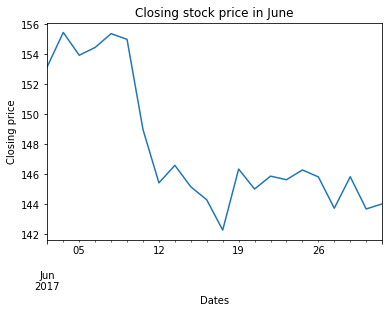

In [12]:
#%matplotlib inline
df2.Close.plot(title="Closing stock price in June", xlabel="Dates", ylabel="Closing price")

In [13]:
# add weekends with fill forward from Friday closing price
df2.asfreq('D', method='pad')

,Open,High,Low,Close,Volume
2017-06-01,153.17,153.33,152.22,153.18,16404088
2017-06-02,153.58,155.45,152.89,155.45,27770715
2017-06-03,153.58,155.45,152.89,155.45,27770715
2017-06-04,153.58,155.45,152.89,155.45,27770715
2017-06-05,154.34,154.45,153.46,153.93,25331662
2017-06-06,153.90,155.81,153.78,154.45,26624926
2017-06-07,155.02,155.98,154.48,155.37,21069647
2017-06-08,155.25,155.54,154.40,154.99,21250798
2017-06-09,155.19,155.19,146.02,148.98,64882657
2017-06-10,155.19,155.19,146.02,148.98,64882657


In [14]:
# 72 business days, starting from Jan 1st
rng2 = pd.date_range(start="1/1/2017", periods=72, freq='B')
rng2

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13', '2017-01-16', '2017-01-17',
               '2017-01-18', '2017-01-19', '2017-01-20', '2017-01-23',
               '2017-01-24', '2017-01-25', '2017-01-26', '2017-01-27',
               '2017-01-30', '2017-01-31', '2017-02-01', '2017-02-02',
               '2017-02-03', '2017-02-06', '2017-02-07', '2017-02-08',
               '2017-02-09', '2017-02-10', '2017-02-13', '2017-02-14',
               '2017-02-15', '2017-02-16', '2017-02-17', '2017-02-20',
               '2017-02-21', '2017-02-22', '2017-02-23', '2017-02-24',
               '2017-02-27', '2017-02-28', '2017-03-01', '2017-03-02',
               '2017-03-03', '2017-03-06', '2017-03-07', '2017-03-08',
               '2017-03-09', '2017-03-10', '2017-03-13', '2017-03-14',
               '2017-03-15', '2017-03-16', '2017-03-17', '2017-03-20',
      

In [15]:
import numpy as np
ts = pd.Series(np.random.randint(1, 10, len(rng)), index=rng)
ts.head(7)

2017-06-01    2
2017-06-02    1
2017-06-05    7
2017-06-06    4
2017-06-07    3
2017-06-08    6
2017-06-09    6
Freq: B, dtype: int64

### part 3: holidays

In [16]:
df3 = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/16_ts_holidays/aapl_no_dates.csv')
#df3.head()

In [17]:
rng = pd.date_range(start="7/1/2017", end="7/21/2017", freq="B")
rng

DatetimeIndex(['2017-07-03', '2017-07-04', '2017-07-05', '2017-07-06',
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20', '2017-07-21'],
              dtype='datetime64[ns]', freq='B')

In [18]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

usb = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [19]:
ranges = pd.date_range(start="7/1/2017", end="7/21/2017", freq=usb)

In [20]:
df3.set_index(ranges, inplace=True)
df3

,Open,High,Low,Close,Volume
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-10,144.11,145.95,143.37,145.06,21090636
2017-07-11,144.73,145.85,144.38,145.53,19781836
2017-07-12,145.87,146.18,144.82,145.74,24884478
2017-07-13,145.50,148.49,145.44,147.77,25199373
2017-07-14,147.97,149.33,147.33,149.04,20132061
2017-07-17,148.82,150.90,148.57,149.56,23793456


In [21]:
from pandas.tseries.holiday import AbstractHolidayCalendar, nearest_workday, Holiday

class myBirthDayCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday('Zayn"s Birth Day', month=9, day=10, observance=nearest_workday),
    ]

myc = CustomBusinessDay(calendar=myBirthDayCalendar())
myc

<CustomBusinessDay>

In [22]:
pd.date_range(start="9/1/2023", end="9/28/2023", freq=myc)

DatetimeIndex(['2023-09-01', '2023-09-04', '2023-09-05', '2023-09-06',
               '2023-09-07', '2023-09-08', '2023-09-12', '2023-09-13',
               '2023-09-14', '2023-09-15', '2023-09-18', '2023-09-19',
               '2023-09-20', '2023-09-21', '2023-09-22', '2023-09-25',
               '2023-09-26', '2023-09-27', '2023-09-28'],
              dtype='datetime64[ns]', freq='C')

In [23]:
# define Egypt weekend
egypt_end = CustomBusinessDay(weekmask='Sun Mon Tue Wed Thu', holidays=['2017-04-04'])
pd.date_range(start="4/01/2017", end="4/30/2017", freq=egypt_end)

DatetimeIndex(['2017-04-02', '2017-04-03', '2017-04-05', '2017-04-06',
               '2017-04-09', '2017-04-10', '2017-04-11', '2017-04-12',
               '2017-04-13', '2017-04-16', '2017-04-17', '2017-04-18',
               '2017-04-19', '2017-04-20', '2017-04-23', '2017-04-24',
               '2017-04-25', '2017-04-26', '2017-04-27', '2017-04-30'],
              dtype='datetime64[ns]', freq='C')

### part 4: to_datetime

In [24]:
dates = ['2017-01-05', 'Jan 5, 2017', '01/05/2017', '2017.01.05', '2017/01/05', '20170105', 'abc']
pd.to_datetime(dates, errors='coerce')

DatetimeIndex(['2017-01-05', '2017-01-05', '2017-01-05', '2017-01-05',
               '2017-01-05', '2017-01-05',        'NaT'],
              dtype='datetime64[ns]', freq=None)

In [25]:
#pd.to_datetime('5$1$2017', format='%d$%m$%Y')
pd.to_datetime('05/01/2017', dayfirst=True)

Timestamp('2017-01-05 00:00:00')

In [26]:
# working with Unix time
t = 1501356749

# convert t to a list object so I can run view in next cell

dt = pd.to_datetime([t], unit='s')
dt

DatetimeIndex(['2017-07-29 19:32:29'], dtype='datetime64[ns]', freq=None)

In [27]:
# extra zeros b/c default is nanoseconds (unit = 'ns' in documentation)

dt.view('int64')

array([1501356749000000000])

### part 5: period and periodindex

In [28]:
y = pd.Period('2016')
y

Period('2016', 'A-DEC')

In [29]:
y.start_time

Timestamp('2016-01-01 00:00:00')

In [30]:
m = pd.Period('2011-1', freq='M')
m

Period('2011-01', 'M')

In [31]:
d = pd.Period('2017-02-28')
d

Period('2017-02-28', 'D')

In [32]:
# performing artithmetic operations on period variables

h = pd.Period('2016-02-28 23:00:00', freq='H')
h

Period('2016-02-28 23:00', 'H')

In [33]:
h.start_time

Timestamp('2016-02-28 23:00:00')

In [34]:
h.end_time

Timestamp('2016-02-28 23:59:59.999999999')

In [35]:
h-6

Period('2016-02-28 17:00', 'H')

In [36]:
h+pd.offsets.Hour(5)

Period('2016-02-29 04:00', 'H')

In [37]:
q = pd.Period('2017Q1', freq='Q-Jan')
q

Period('2017Q1', 'Q-JAN')

In [38]:
q.start_time

Timestamp('2016-02-01 00:00:00')

In [39]:
q+9

Period('2019Q2', 'Q-JAN')

In [40]:
q.asfreq('M', how='start')

Period('2016-02', 'M')

In [41]:
# range (start=, end=, freq=)
idx = pd.period_range('2011', periods=10, freq='Q-JAN')
idx

PeriodIndex(['2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1',
             '2013Q2', '2013Q3', '2013Q4', '2014Q1'],
            dtype='period[Q-JAN]', freq='Q-JAN')

In [42]:
idx[0].start_time

Timestamp('2010-11-01 00:00:00')

In [43]:
idx[0].end_time

Timestamp('2011-01-31 23:59:59.999999999')

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/18_ts_period/wmt.csv')
df.head()

,Line Item,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
0,Revenue,115904,120854,118179,130936,117542
1,Expenses,86544,89485,87484,97743,87688
2,Profit,29360,31369,30695,33193,29854


In [45]:
q_rng = pd.date_range(start="11/30/2016", end="8/1/2017", freq="Q-JAN")

In [46]:
df.set_index(q_rng, inplace=True)
df

,Line Item,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
2017-01-31,Revenue,115904,120854,118179,130936,117542
2017-04-30,Expenses,86544,89485,87484,97743,87688
2017-07-31,Profit,29360,31369,30695,33193,29854


In [47]:
df = df.T
df

,2017-01-31,2017-04-30,2017-07-31
Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


In [48]:
df.index

Index(['Line Item', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='object')

In [49]:
#df.index = pd.PeriodIndex(df.index, freq='Q-JAN')
#df.index

In [52]:
print(df.columns)

DatetimeIndex(['2017-01-31', '2017-04-30', '2017-07-31'], dtype='datetime64[ns]', freq='Q-JAN')


In [57]:
#df['start date'] = df.index.map(lambda x: x.start_time)
#df

In [72]:
df['start date'] = df.index
df

,2017-01-31 00:00:00,2017-04-30 00:00:00,2017-07-31 00:00:00,start date
Line Item,Revenue,Expenses,Profit,Line Item
2017Q1,115904,86544,29360,2017Q1
2017Q2,120854,89485,31369,2017Q2
2017Q3,118179,87484,30695,2017Q3
2017Q4,130936,97743,33193,2017Q4
2018Q1,117542,87688,29854,2018Q1


In [67]:
#df['start date'] = pd.to_datetime(df.index, format='%Y-Q%q')
#df['start date'] = df.index.strftime('%Y-Q%q')

### part 6: timezone handling

In [76]:
#df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/19_ts_timezone/msft.csv')
#df

,"Microsoft Stock Price: 17 August, 2017",Unnamed: 1
0,Date Time,Price
1,8/17/2017 9:00:00 AM,72.38
2,8/17/2017 9:15:00 AM,71
3,8/17/2017 9:30:00 AM,71.67
4,8/17/2017 10:00:00 AM,72.8
5,8/17/2017 10:30:00 AM,73
6,8/17/2017 11:00:00 AM,72.5


In [78]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/19_ts_timezone/msft.csv', header=1, index_col="Date Time", parse_dates=True)
df

,Price
Date Time,
2017-08-17 09:00:00,72.38
2017-08-17 09:15:00,71.00
2017-08-17 09:30:00,71.67
2017-08-17 10:00:00,72.80
2017-08-17 10:30:00,73.00
2017-08-17 11:00:00,72.50


In [79]:
df.index

DatetimeIndex(['2017-08-17 09:00:00', '2017-08-17 09:15:00',
               '2017-08-17 09:30:00', '2017-08-17 10:00:00',
               '2017-08-17 10:30:00', '2017-08-17 11:00:00'],
              dtype='datetime64[ns]', name='Date Time', freq=None)

In [91]:
#df = df.tz_localize(tz='US/Eastern')
#df.index

In [90]:
df = df.tz_convert(tz='Europe/Berlin')
df

,Price
Date Time,
2017-08-17 15:00:00+02:00,72.38
2017-08-17 15:15:00+02:00,71.00
2017-08-17 15:30:00+02:00,71.67
2017-08-17 16:00:00+02:00,72.80
2017-08-17 16:30:00+02:00,73.00
2017-08-17 17:00:00+02:00,72.50


In [94]:
from pytz import all_timezones
#all_timezones

In [99]:
# convert to see the difference. ex: +2:00 in this example
b = df.tz_convert(tz = 'Europe/Berlin')
b

,Price
Date Time,
2017-08-17 15:00:00+02:00,72.38
2017-08-17 15:15:00+02:00,71.00
2017-08-17 15:30:00+02:00,71.67
2017-08-17 16:00:00+02:00,72.80
2017-08-17 16:30:00+02:00,73.00
2017-08-17 17:00:00+02:00,72.50


### part 7: shifting and lagging

In [102]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/20_shift_lag/fb.csv', index_col="Date")
df

,Price
Date,
15-Aug-17,171.00
16-Aug-17,170.00
17-Aug-17,166.91
18-Aug-17,167.41
21-Aug-17,167.78
22-Aug-17,169.64
23-Aug-17,168.71
24-Aug-17,167.74
25-Aug-17,166.32


In [105]:
# shifts price by df.shift(n)
df.shift(2)

,Price
Date,
15-Aug-17,NaN
16-Aug-17,NaN
17-Aug-17,171.00
18-Aug-17,170.00
21-Aug-17,166.91
22-Aug-17,167.41
23-Aug-17,167.78
24-Aug-17,169.64
25-Aug-17,168.71


In [110]:
df['Prev Day Price'] = df['Price'].shift(1)
df

,Price,Prev Day Price
Date,,
15-Aug-17,171.00,NaN
16-Aug-17,170.00,171.00
17-Aug-17,166.91,170.00
18-Aug-17,167.41,166.91
21-Aug-17,167.78,167.41
22-Aug-17,169.64,167.78
23-Aug-17,168.71,169.64
24-Aug-17,167.74,168.71
25-Aug-17,166.32,167.74


In [112]:
df['Percent Change'] = df['Price'].pct_change() * 100
df

,Price,Prev Day Price,percent change
Date,,,
15-Aug-17,171.00,NaN,NaN
16-Aug-17,170.00,171.00,-0.584795
17-Aug-17,166.91,170.00,-1.817647
18-Aug-17,167.41,166.91,0.299563
21-Aug-17,167.78,167.41,0.221014
22-Aug-17,169.64,167.78,1.108595
23-Aug-17,168.71,169.64,-0.548220
24-Aug-17,167.74,168.71,-0.574951
25-Aug-17,166.32,167.74,-0.846548


In [114]:
df['5 day % return'] = (df['Price'] - df['Price'].shift(5))*100/df['Price'].shift(5)
df

,Price,Prev Day Price,percent change,5 day % return
Date,,,,
15-Aug-17,171.00,NaN,NaN,NaN
16-Aug-17,170.00,171.00,-0.584795,NaN
17-Aug-17,166.91,170.00,-1.817647,NaN
18-Aug-17,167.41,166.91,0.299563,NaN
21-Aug-17,167.78,167.41,0.221014,NaN
22-Aug-17,169.64,167.78,1.108595,-0.795322
23-Aug-17,168.71,169.64,-0.548220,-0.758824
24-Aug-17,167.74,168.71,-0.574951,0.497274
25-Aug-17,166.32,167.74,-0.846548,-0.651096


In [116]:
# shrink df to price column only
df = df[['Price']]
df

,Price
Date,
15-Aug-17,171.00
16-Aug-17,170.00
17-Aug-17,166.91
18-Aug-17,167.41
21-Aug-17,167.78
22-Aug-17,169.64
23-Aug-17,168.71
24-Aug-17,167.74
25-Aug-17,166.32


In [117]:
df.index

Index(['15-Aug-17', '16-Aug-17', '17-Aug-17', '18-Aug-17', '21-Aug-17',
       '22-Aug-17', '23-Aug-17', '24-Aug-17', '25-Aug-17', '28-Aug-17'],
      dtype='object', name='Date')

In [120]:
#idx = pd.to_datetime(df['Date'])